# Heart Disease UCI

Kaggle's Dataset

In [1]:
# importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import svm
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.decomposition import *

In [2]:
# load dataset
df = pd.read_csv('heart.csv' , sep=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


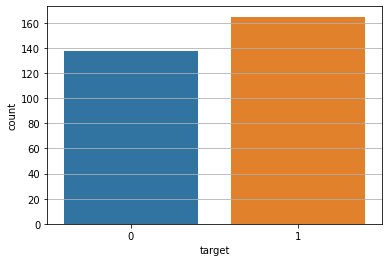

In [5]:
# count plot of heart disease
sns.countplot(data = df , x = 'target')
plt.grid(axis = 'y')

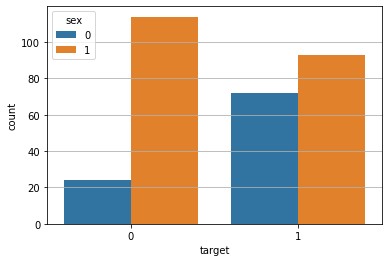

In [6]:
# 1 - Male  /  0 - Female
sns.countplot(data = df , x = 'target' , hue = 'sex')
plt.grid(axis = 'y')

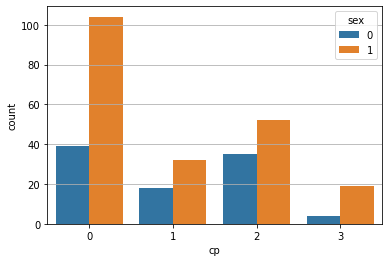

In [7]:
# chest pain grouped by sex
sns.countplot(data = df , x = 'cp' , hue = 'sex')
plt.grid(axis = 'y')

Text(0.5, 1.0, 'Data Correlation')

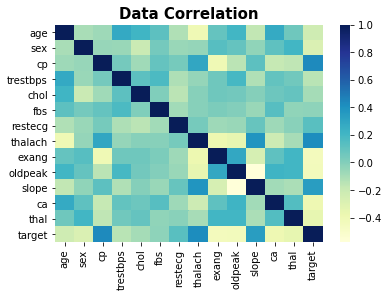

In [8]:
# correlation matrix about each column
matrix_corr = df.corr()
sns.heatmap(matrix_corr,
            xticklabels = matrix_corr.columns,
            yticklabels = matrix_corr.columns , cmap = 'YlGnBu')
plt.title('Data Correlation' , size = 15 , weight = 'bold')

In [9]:
# correlation between columns and target in spearman method 
matrix_corr1 = df.corr(method='spearman')
matrix_corr1 = matrix_corr1['target'].sort_values(ascending=False)
print(matrix_corr1)

target      1.000000
cp          0.460860
thalach     0.428370
slope       0.371460
restecg     0.148612
fbs        -0.028046
chol       -0.120888
trestbps   -0.121593
age        -0.238400
sex        -0.280937
thal       -0.403299
oldpeak    -0.421487
exang      -0.436757
ca         -0.457607
Name: target, dtype: float64


In [10]:
# dropping the best possible features to create some PCA
features = df.drop(['cp','thalach','ca','exang','oldpeak','thal','slope','sex','target'] , axis = 1)

In [11]:
# pca
scaler_atr = StandardScaler()

atb = scaler_atr.fit_transform(features)
X = np.matrix(atb)
S = np.cov(np.transpose(X)) 

In [12]:
pca = PCA(n_components=4)

pca.fit(X)

components = np.round(pca.explained_variance_ratio_ , 2)

pca_1 = pca.transform(X)[:,0]
pca_2 = pca.transform(X)[:,1]
pca_3 = pca.transform(X)[:,2]
pca_4 = pca.transform(X)[:,3]

df['PCA1'] = pca_1
df['PCA2'] = pca_2
df['PCA3'] = pca_3
df['PCA4'] = pca_4

In [13]:
# selecting best features
features = df[['cp','thalach','ca','exang','oldpeak','thal','slope','sex','PCA1','PCA2','PCA3','PCA4']]
label = df[['target']]

In [14]:
# normalize the data
scaler = StandardScaler()
features = scaler.fit_transform(features)

features_train, features_test, label_train, label_test = train_test_split(
    features, label, test_size=0.25, random_state=0)

In [15]:
# Random Forest Classifer using Grid Search to find best hiper-params
clf = RandomForestClassifier()

param_grid = [{'n_estimators':[10,20,25,30,35,40,45,50,55,60,70,80,90,100,150,200,250],
               'max_depth':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25],
               'criterion':['gini','entropy']}]

GS = GridSearchCV(clf , param_grid , scoring= 'accuracy' , error_score= 'raise' , cv =5)


GS.fit(features_train , label_train)
print(GS.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 45}


In [16]:
# trainning classifier with found params
clf = RandomForestClassifier(criterion = GS.best_params_['criterion'],
                             max_depth = GS.best_params_['max_depth'],
                             n_estimators = GS.best_params_['n_estimators'])

clf.fit(features_train , label_train)
predictions = clf.predict(features_test)

acc = sklearn.metrics.accuracy_score(label_test , predictions)
print('Random Forest Accuracy: ', acc)

Random Forest Accuracy:  0.8421052631578947


In [17]:
# Support Vector Classfier using Grid Search to find best hiper-params
clf1 = svm.SVC()

param_grid = [{'C': [0.1,0.5, 1, 5, 10, 100, 1000],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
               'kernel':['linear', 'poly', 'rbf']}]

GS = GridSearchCV(clf1 , param_grid , scoring= 'accuracy' , error_score= 'raise' , cv =5)
GS.fit(features_train , label_train)
print(GS.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [18]:
# trainning classifier with found params
clf1 = svm.SVC(C = GS.best_params_['C'],
                             gamma = GS.best_params_['gamma'],
                             kernel = GS.best_params_['kernel'])

clf1.fit(features_train , label_train)
predictions = clf1.predict(features_test)

acc = sklearn.metrics.accuracy_score(label_test , predictions)
print('SVM Accuracy: ', acc)

SVM Accuracy:  0.8157894736842105


In [19]:
# Gradient Boosting Classifier using Grid Search to find best hiper-params
clf2 = sklearn.ensemble.GradientBoostingClassifier()

param_grid = [{
    'loss':['deviance'],
    'learning_rate': [ 0.05, 0.075, 0.1,  0.2,0.5],
    'min_samples_split': np.linspace(0.1, 0.5, 3),
    'min_samples_leaf': np.linspace(0.1, 0.5, 3),
    'max_depth':[3,5,8,10],
    'max_features':['log2','sqrt'],
    'criterion': ['mae'],
    'subsample':[0.5, 0.8, 0.9, 0.95, 1.0],
    'n_estimators':[10,30,50]}]

GS = GridSearchCV(clf2 , param_grid , scoring= 'accuracy' , error_score= 'raise' , cv =5)
GS.fit(features_train , label_train)
print(GS.best_params_)

{'criterion': 'mae', 'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.5, 'n_estimators': 50, 'subsample': 0.9}


In [20]:
# trainning classifier with found params
clf2 = sklearn.ensemble.GradientBoostingClassifier(loss = GS.best_params_['loss'],
                             learning_rate = GS.best_params_['learning_rate'],
                             min_samples_split = GS.best_params_['min_samples_split'],
                             min_samples_leaf = GS.best_params_['min_samples_leaf'],
                             max_depth = GS.best_params_['max_depth'],
                             max_features = GS.best_params_['max_features'],
                             criterion = GS.best_params_['criterion'],
                             subsample = GS.best_params_['subsample'],
                             n_estimators = GS.best_params_['n_estimators'])

clf2.fit(features_train , label_train)
predictions = clf2.predict(features_test)

acc = sklearn.metrics.accuracy_score(label_test , predictions)
print('Gradient Boosting Accuracy: ', acc)

Gradient Boosting Accuracy:  0.8421052631578947


In [21]:
# Votting Ensemble: model combining 3 preview classifiers
vot_clf = VotingClassifier(estimators=[('RF', clf), 
                                       ('SVM', clf1), 
                                       ('GB', clf2)], voting='hard' , weights=[1,1,2])

vot_clf = vot_clf.fit(features_train , label_train)
predictions = vot_clf.predict(features_test)
acc = sklearn.metrics.accuracy_score(label_test , predictions)
print('Ensemble Classifier Accuracy: ', acc)

Ensemble Classifier Accuracy:  0.881578947368421


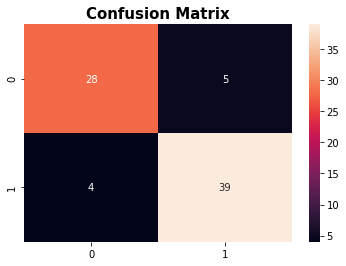

In [22]:
# plotting confusion matrix
cm = confusion_matrix(label_test, predictions)

sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix' , size = 15 , weight = 'bold')
plt.show()